# One-vs-All Classification with Neural Network

week04のMulti-class Classificationの課題について

In [1]:
import math
import numpy as np
from scipy import optimize
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)   # 図を大きく表示

## Dataset

In [3]:
dataset = loadmat('ex3data1.mat')
X = dataset['X']
y = dataset['y']

X.shape, y.shape

((5000, 400), (5000, 1))

## Model representation

In [4]:
weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

theta1.shape, theta2.shape

((25, 401), (10, 26))

## Feedforward Propagation and Prediction

In [5]:
%run 'nn_classifier.py'

In [6]:
ypreds = predict(theta1, theta2, X)
compute_train_accuracy(ypreds, y)

97.519999999999996

## Visualize prediction mistakes

In [7]:
def display_data(images, labels, indexes):
    m = len(indexes)
    rows = math.floor(math.sqrt(m))
    columns = math.ceil(m / rows)

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7)

    for row in range(rows):
        for col in range(columns):
            i = row * columns + col
            if i >= m: break
            index = indexes[i];
            ax = fig.add_subplot(rows, columns, i+1)
            ax.axis('off')
            ax.set_title(labels[index])
            ax.imshow(images[index].reshape(20,20).T, cmap = plt.get_cmap('gray'))

In [8]:
mistakes = (np.where(ypreds != y))[0]

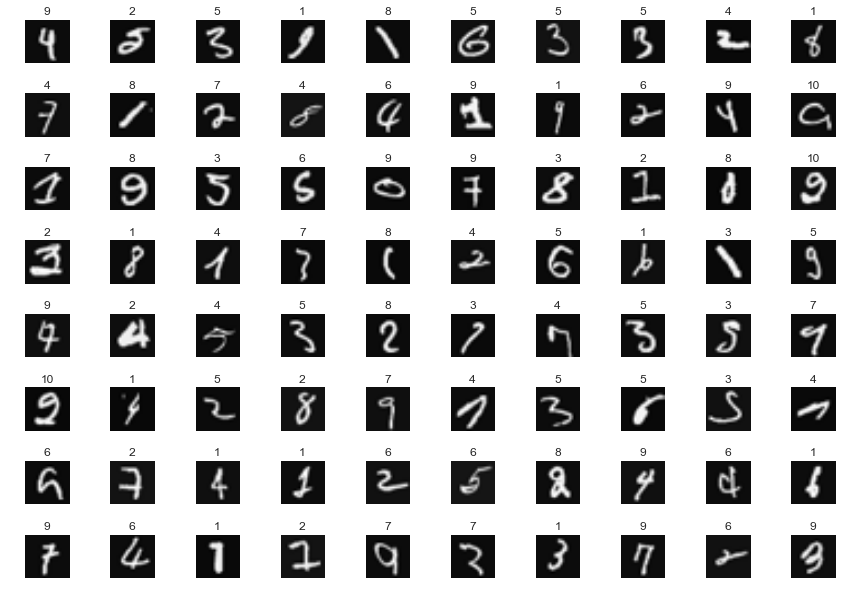

In [9]:
labels = ypreds.ravel().tolist()
display_data(X, labels, np.random.permutation(mistakes)[0:80])
plt.savefig('week04_nn_mistakes.png')